In [14]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [15]:
# Correlator specifics
ENSEMBLE = 'Coarse-Phys'
MESON    = 'Dst'
MOMENTUM = '200'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 19
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 1e-12

# Specifics of the analysis
TRANGE_EFF = (11,21) 
TRANGE     = (5,21)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [16]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [17]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [18]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 0.67 [66]    Q = 0.98    logGBF = 170.08

Parameters:
          const   1.1097 (32)     [ 1.112 (49) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.7 [66]    Q = 0.97    logGBF = 266.18

Parameters:
('1S-1S', 'Bot')     2.083 (24)      [    2.06 (16) ]  
('1S-1S', 'Par')     2.268 (30)      [    2.28 (30) ]  
 ('d-1S', 'Bot')    0.2137 (15)      [  0.2127 (65) ]  
 ('d-1S', 'Par')    0.2285 (22)      [   0.228 (24) ]  
  ('d-d', 'Bot')   0.02221 (16)      [ 0.02221 (37) ]  
  ('d-d', 'Par')   0.02350 (23)      [  0.0235 (26) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


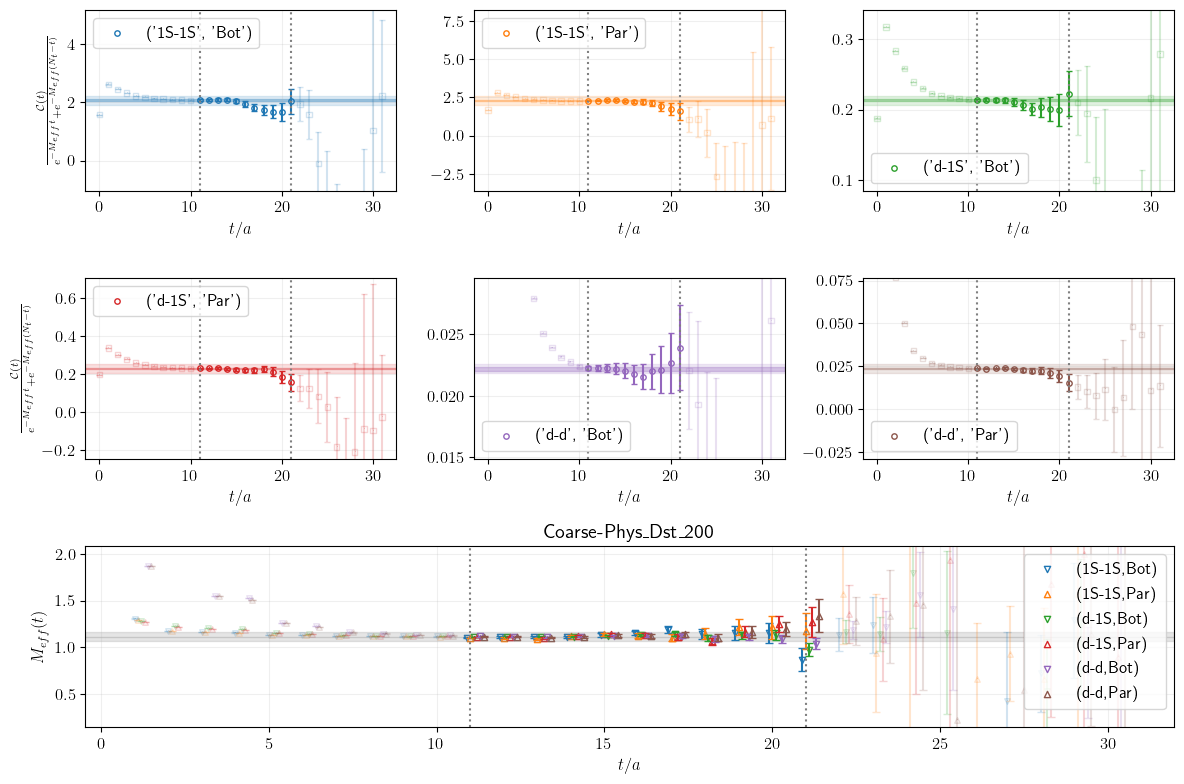

In [22]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.title(f'{ENSEMBLE}_{MESON}_{MOMENTUM}')

plt.tight_layout()

plt.show()


Here we set priors

In [8]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)
priors

{'E': [1.110(47), -1.82(58), -1.10(80), -2.4(2.5), -2.4(2.5), -2.4(2.5)],
 'Z_1S_Bot': [0.37(58), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_1S_Par': [0.41(65), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Bot': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d-1S_Par': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Bot': [-1.90(36), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d_Par': [-1.88(49), -5.5(2.0), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [9]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (5, 21) for mes: Dst of ens: Coarse-Phys for mom: 200 --------------
Least Square Fit:
  chi2/dof [dof] = 0.62 [102]    Q = 1    logGBF = 1808.5

Parameters:
            E 0   1.1102 (36)     [ 1.110 (47) ]  
              1    -2.56 (43)     [ -1.82 (58) ]  *
              2    -1.09 (40)     [ -1.10 (80) ]  
              3    -2.24 (42)     [ -2.4 (2.5) ]  
              4    -0.60 (26)     [ -2.4 (2.5) ]  
              5    -0.58 (21)     [ -2.4 (2.5) ]  
     Z_1S_Bot 0    0.308 (24)     [  0.37 (58) ]  
              1    -0.26 (32)     [ -1.2 (1.2) ]  
              2     0.86 (28)     [  0.5 (1.5) ]  
              3     0.50 (56)     [  0.5 (1.5) ]  
              4     0.6 (2.3)     [  0.5 (3.0) ]  
              5     2.11 (60)     [  0.5 (3.0) ]  
     Z_1S_Par 0    0.349 (24)     [  0.41 (65) ]  
              1    -0.56 (33)     [ -1.2 (1.2) ]  
              2     0.89 (30)     [  0.5 (1.5) ]  
              3     0.66 (29)     [  0.5 (1.5) ]  
   

In [10]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (5, 21) for mes: Dst of ens: Coarse-Phys for mom: 200 --------------
Least Square Fit:
  chi2/dof [dof] = 0.62 [102]    Q = 1    logGBF = 1808.5

Parameters:
            E 0   1.1102 (36)     [ 1.110 (47) ]  
              1    -2.56 (43)     [ -1.82 (58) ]  *
              2    -1.09 (40)     [ -1.10 (80) ]  
              3    -2.24 (42)     [ -2.4 (2.5) ]  
              4    -0.60 (26)     [ -2.4 (2.5) ]  
              5    -0.58 (21)     [ -2.4 (2.5) ]  
     Z_1S_Bot 0    0.308 (24)     [  0.37 (58) ]  
              1    -0.26 (32)     [ -1.2 (1.2) ]  
              2     0.86 (28)     [  0.5 (1.5) ]  
              3     0.50 (56)     [  0.5 (1.5) ]  
              4     0.6 (2.3)     [  0.5 (3.0) ]  
              5     2.11 (60)     [  0.5 (3.0) ]  
     Z_1S_Par 0    0.349 (24)     [  0.41 (65) ]  
              1    -0.56 (33)     [ -1.2 (1.2) ]  
              2     0.89 (30)     [  0.5 (1.5) ]  
              3     0.66 (29)     [  0.5 (1.5) ]  
 

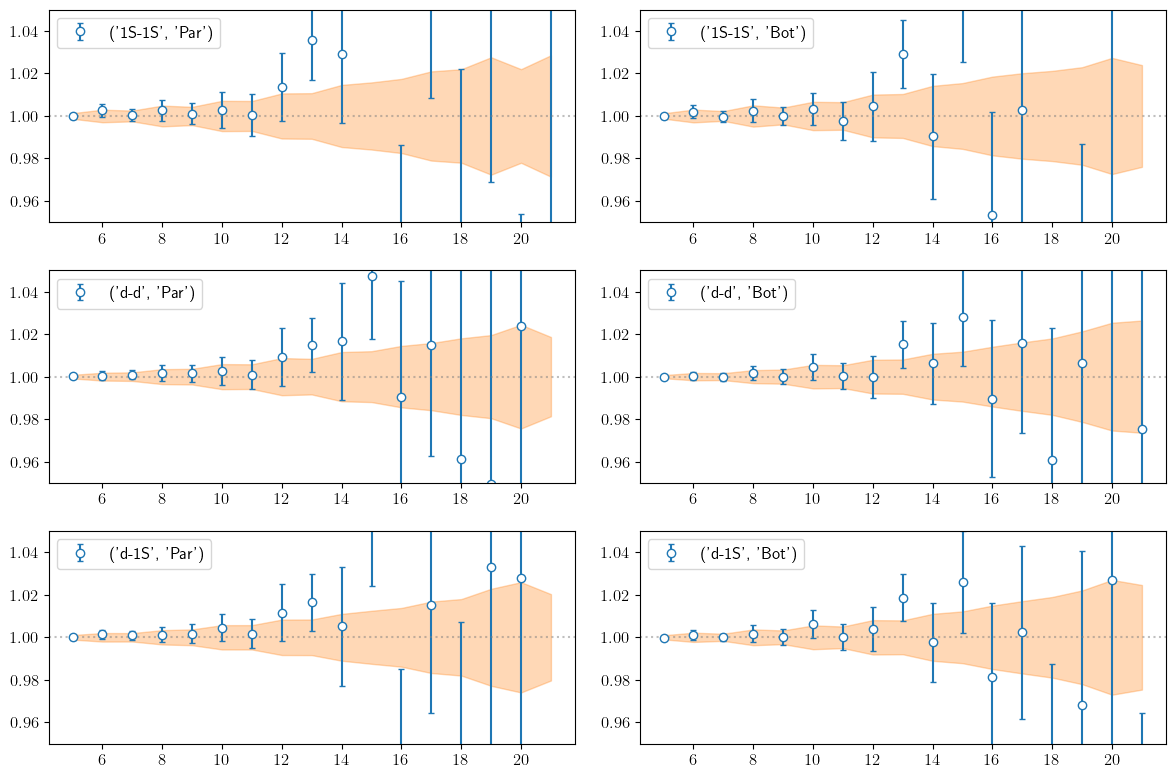

In [11]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()

In [12]:
from b2heavy.TwoPointFunctions.utils import p_value

def standard_p(io,fit):
    chi2red = fit.chi2
    for k,pr in fit.prior.items():
        for i,p in enumerate(pr):
            chi2red -= ((fit.pmean[k][i]-p.mean)/p.sdev)**2
    
    ndof  = len(fit.y) - sum([len(pr) for k,pr in fit.prior.items()]) 

    aux = StagFitter(io=io,jkBin=0)
    nconf = aux.data.shape[-2]

    return p_value(chi2red,nconf,ndof)


standard_p(io,fit)

0.7908626218080774

In [13]:
from b2heavy.TwoPointFunctions.utils import p_value

chi2  = float(fitres['chi2'])
aux = StagFitter(
    io       = io,
    jkBin    = 0,
    smearing = SMSLIST
)
nconf = aux.data.shape[-2]
ndof  = len(fit.y) - sum([len(priors[k]) for k in priors]) 

p_value(chi2,nconf,ndof)

0.7908626218080905